# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [230]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import numpy as np
import pandas as pd
import random
import seaborn as sns
TEXT_COLOR = 'black'

sns.set_style('darkgrid')

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [231]:
df_src = pd.read_csv('heart_cleveland_upload.csv', index_col=0)

In [232]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 69 to 35
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        297 non-null    int64  
 1   cp         297 non-null    int64  
 2   trestbps   297 non-null    int64  
 3   chol       297 non-null    int64  
 4   fbs        297 non-null    int64  
 5   restecg    297 non-null    int64  
 6   thalach    297 non-null    int64  
 7   exang      297 non-null    int64  
 8   oldpeak    297 non-null    float64
 9   slope      297 non-null    int64  
 10  ca         297 non-null    int64  
 11  thal       297 non-null    int64  
 12  condition  297 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 32.5 KB


In [233]:
df_src

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,,,,,,,,,,,,,
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1


AGE: возраст в годах

SEX: пол (1 = мужчина; 0 = женщина)

CP: тип боли в груди
- Значение 0: типичная стенокардия
- Значение 1: атипичная стенокардия
- Значение 2: неангинальная боль
- Значение 3: бессимптомная

TRESTBPS: артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)

CHOL: холесторал в сыворотке в мг / дл

FBS: (уровень сахара в крови натощак> 120 мг / дл) (1 = правда; 0 = ложь)

RESTECG: результаты электрокардиографии в состоянии покоя - Значение 0: нормальное
- Значение 1: аномалия зубца ST-T (инверсия зубца T и / или подъем или депрессия ST> 0,05 мВ)
- Значение 2: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса

THALACH: достигнута максимальная частота сердечных сокращений

EXANG: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

OLDPEAK = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом

SLOPE: наклон сегмента ST пикового упражнения
- Значение 0: наклон вверх
- Значение 1: плоский
- Значение 2: наклон вниз

CA: количество крупных сосудов (0-3), окрашенных флуросопией

THAL: 0 = норма; 1 = исправленный дефект; 2 = обратимый дефект и метка

CONDITION: 0 = нет заболевания, 1 = заболевание

In [234]:
df_src['age'] = df_src.index
new_df_src = df_src.reindex(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'])
new_df_src.reset_index(drop = True , inplace = True )
new_df_src

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [235]:
new_df_src['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

<AxesSubplot: xlabel='condition', ylabel='Count'>

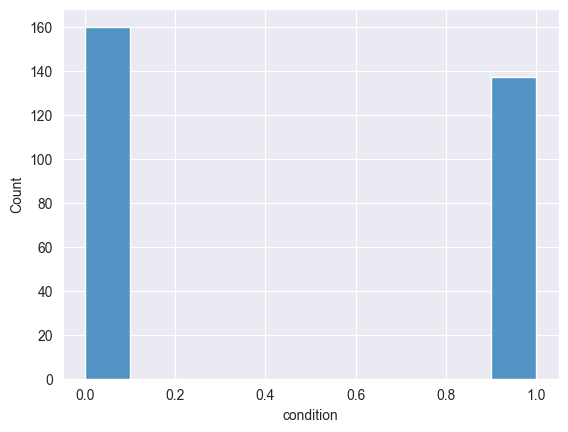

In [236]:
sns.histplot(new_df_src, x='condition') #Значительного перекоса в данных не вижу

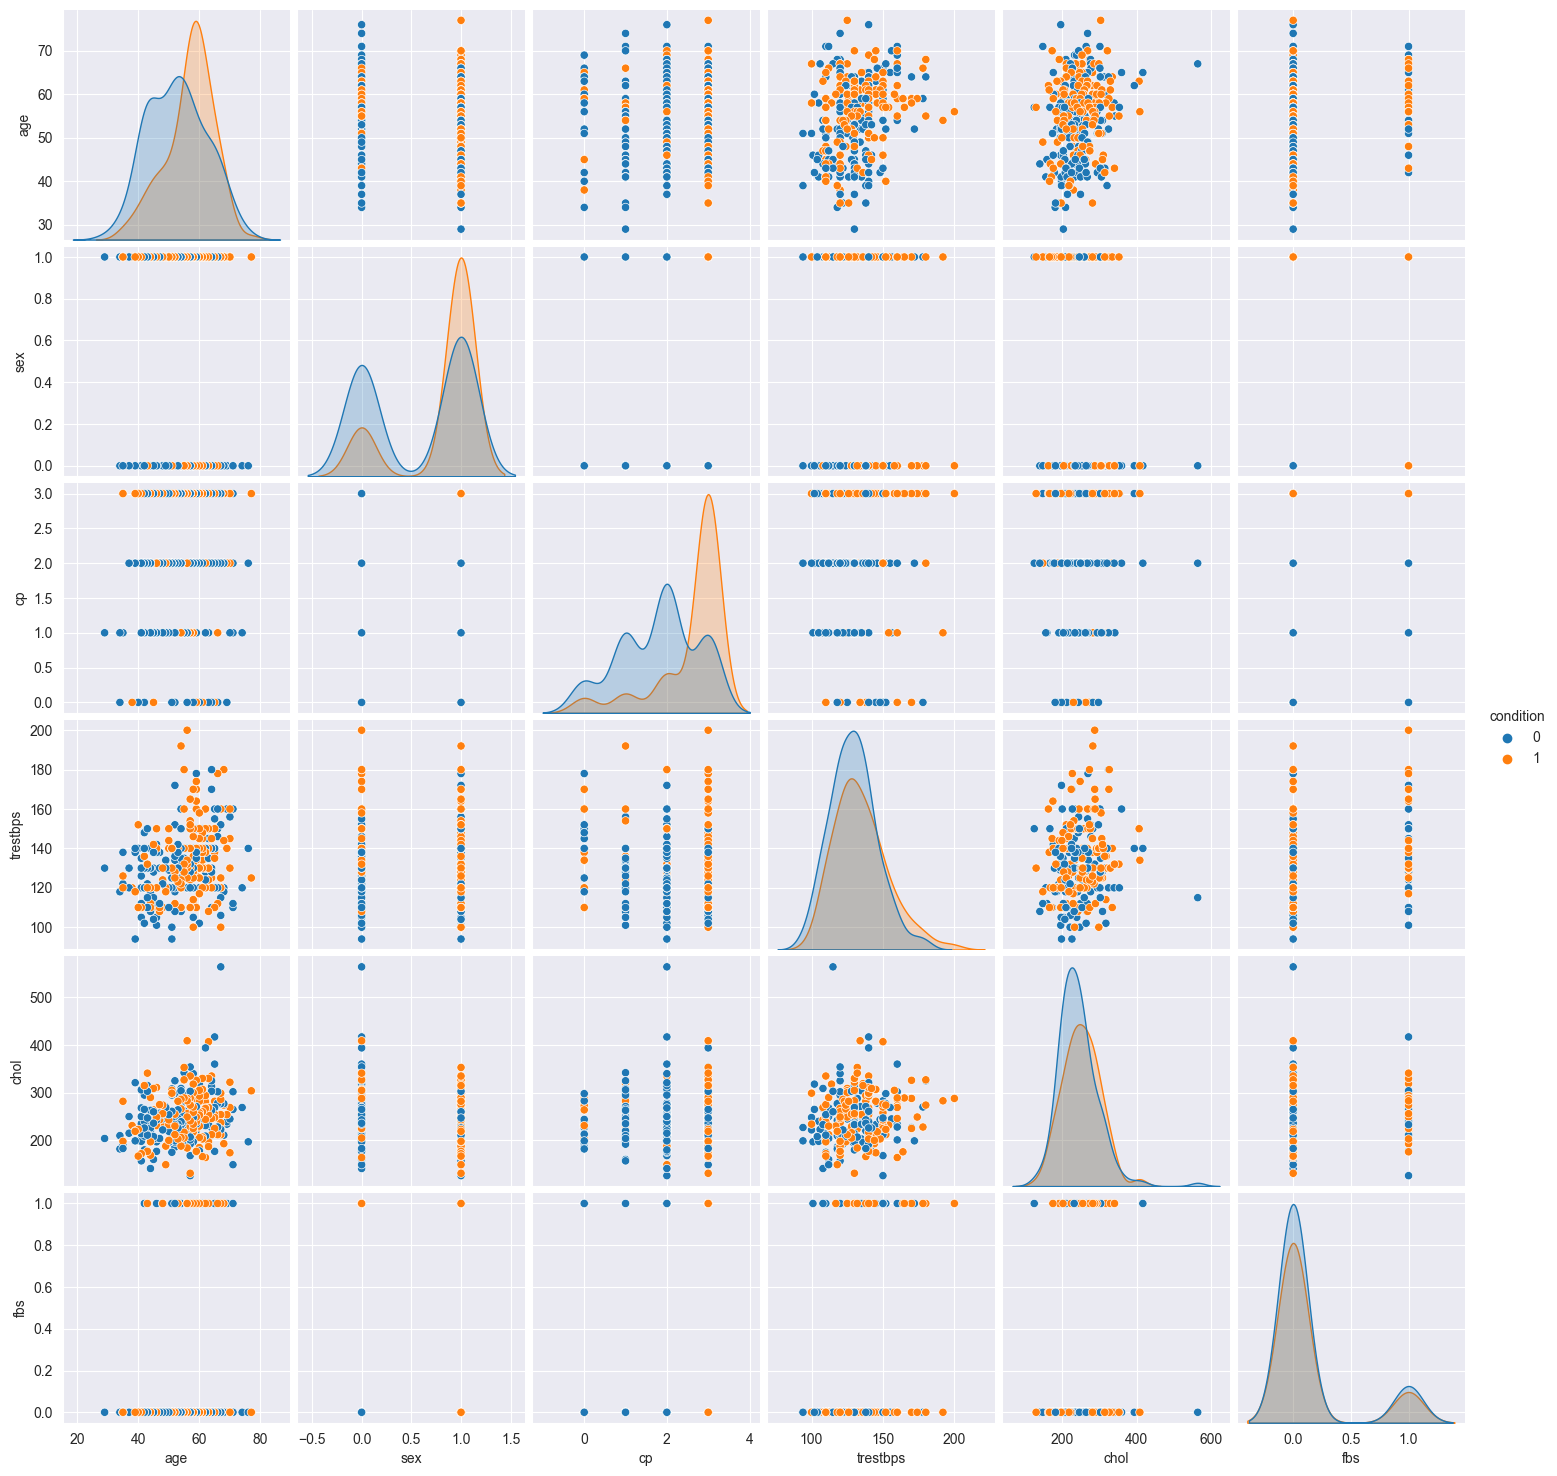

In [237]:
sns.pairplot(data = new_df_src, vars=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs'], hue='condition')

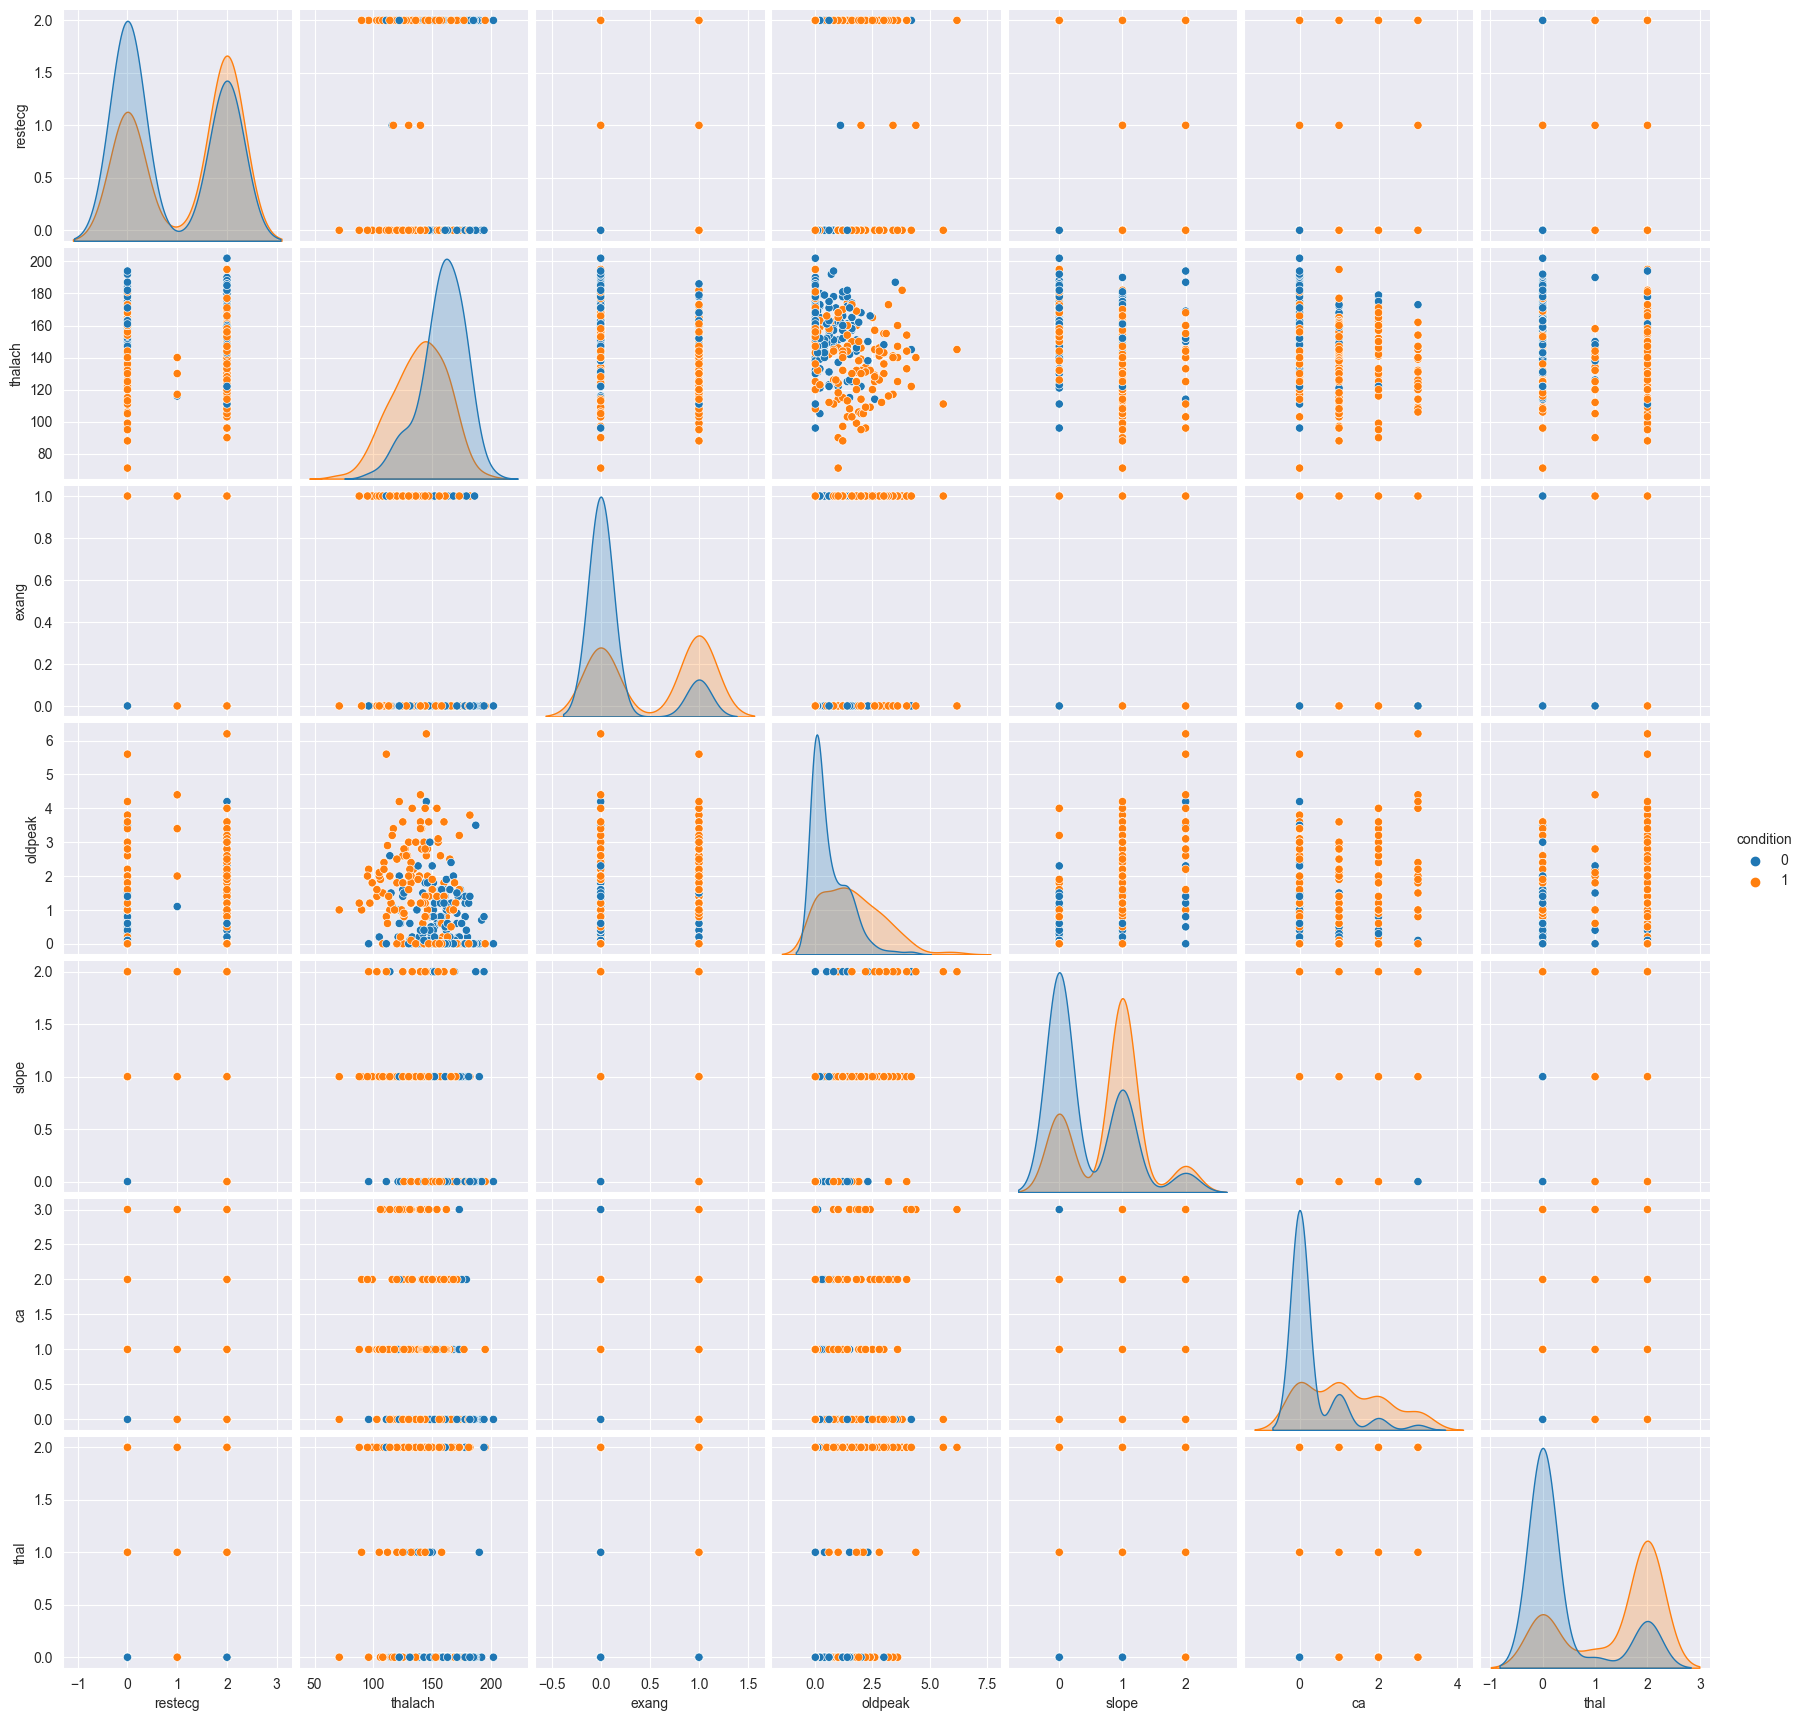

In [238]:
sns.pairplot(data = new_df_src, vars=['restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], hue='condition')

In [239]:
df_train, df_test = train_test_split(new_df_src, test_size = 0.3, stratify = new_df_src['condition'], random_state = RANDOM_SEED)
print(f"Train/test shapes: {df_train.shape}, {df_test.shape}")

Train/test shapes: (207, 14), (90, 14)


In [240]:
model = LogisticRegression(random_state = RANDOM_SEED, solver = 'lbfgs', max_iter = 1000)

#x_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',	'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
copy_df_train = df_train.copy()
copy_df_test = df_test.copy()

y_train = copy_df_train.pop("condition")
y_test = copy_df_test.pop("condition")

#y_train = df_train["condition"]
#x_train = df_train[x_columns]

# обучаем модель на обучающей выборке 
model.fit(copy_df_train, y_train)

# получаем предсказания на тестовой выборке 
y_pred = model.predict(copy_df_test)

In [241]:
report = classification_report(y_test, y_pred, digits=4)
print(report)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.8364    0.9583    0.8932        48
           1     0.9429    0.7857    0.8571        42

    accuracy                         0.8778        90
   macro avg     0.8896    0.8720    0.8752        90
weighted avg     0.8861    0.8778    0.8764        90

[[46  2]
 [ 9 33]]


Recall выглядит так себе, поэтому далее постараюсь его повысить, так как сейчас фактически каждый 5 больной определяется, как здоровый. Но перед этим еще гляну на точность модели в независимости от порога вероятности:

c:\Users\Bychkov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


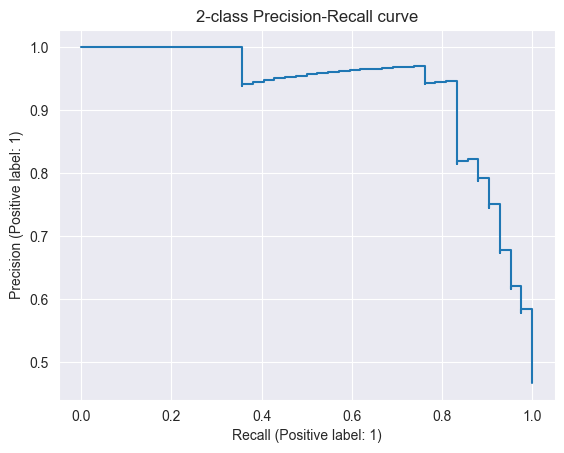

In [242]:
disp = plot_precision_recall_curve(model, copy_df_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')
disp.ax_.get_legend().remove()

In [243]:
y_probs = model.predict_proba(copy_df_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1])
logreg_pr_auc = metrics.auc(recall, precision)
print(f'PR AUC: {logreg_pr_auc}') #Точность получилась неплохая

PR AUC: 0.9322345595865905


Text(0.5, 1.0, 'Precision-Recall Curve')

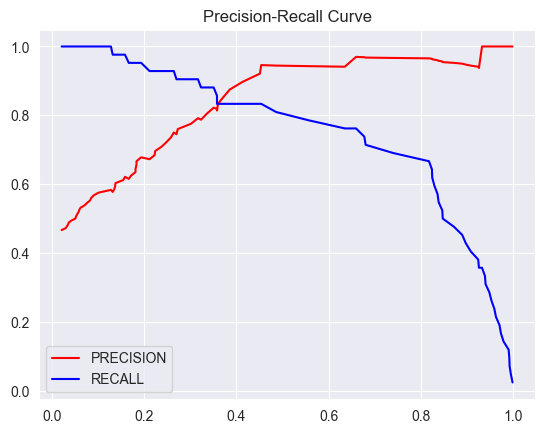

In [244]:
plt.plot(thresholds, precision[:-1], c ='r', label ='PRECISION')
plt.plot(thresholds, recall[:-1], c ='b', label ='RECALL')
plt.legend()
plt.title('Precision-Recall Curve')

Оптимальный порог я здесь вижу равным 0,35, но так как в данном датасете нам важнее повысить RECALL, то порог будет снижен примерно до 0,3

In [245]:
def predict_threshold(y_probs, threshold):
    vector = y_probs[:, 1] >= threshold
    return vector

y_pred_03 = predict_threshold(y_probs, 0.31)
report = classification_report(y_test, y_pred_03, digits=4)
print(report)
print(confusion_matrix(y_test, y_pred_03))

              precision    recall  f1-score   support

           0     0.9048    0.7917    0.8444        48
           1     0.7917    0.9048    0.8444        42

    accuracy                         0.8444        90
   macro avg     0.8482    0.8482    0.8444        90
weighted avg     0.8520    0.8444    0.8444        90

[[38 10]
 [ 4 38]]


Исходя из данных выше, явного дисбаланса между классами не наблюдается, что позволяет говорить о том, что модель умеет более или менее объективно предсказывать как 0, так 1. Также об этом свидетельсвует метрика F1 - score. Исходя из значения Recall, модель стала чаще правильно предсказывать наличие болезни, однако, это привело к снижению Recall для класса 0, что в контексте данного датасета не так страшно. Изменение Recall с помощью изменения порога привело к соотвествующим изменениям Precision. После изменения порога можно наблюдать снижение точности, что объясняется тем, что модель стала чаще характеризовать здоровых людей - больными.